In [ ]:
!git clone https://github.com/eshwarprasadS/CVAssignmentDataset.git

Cloning into 'CVAssignmentDataset'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [ ]:
%cd CVAssignmentDataset

/content/CVAssignmentDataset


In [ ]:
import pandas as pd
df=pd.read_csv('CVAssignmentDataset.csv')

In [ ]:
df.head()

,Class,Text
0,1,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,1,RT @WinterHavenSun: Winter Haven resident / Al...
2,1,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,1,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,1,RT @Vegalteno: Hurricane season starts on June...


In [ ]:
df=df[df['Class']!='https://t.co/sbSljdw1Zw']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


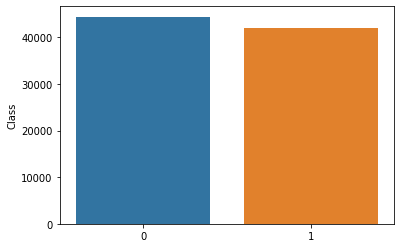

In [ ]:
import seaborn as sns
x=df.Class.value_counts()
sns.barplot(x.index,x)

In [ ]:
df[df['Class']=='0']

,Class,Text
42069,0,"It's #WastefulWednesday! \n\nToday, I introduc..."
42070,0,Today we honored all the heroic men &amp; wome...
42071,0,"RT @CongressmanRaja: Last week, @RepRalphNorma..."
42072,0,RT @TegaCayPD: Chief Parker was thankful to re...
42073,0,I visited the SC Highway Patrol to bring them ...
...,...,...
86456,0,Check out my op-ed on need for End Executive O...
86457,0,"Yesterday, Betty &amp; I had a great time lear..."
86458,0,We are forever grateful for the service and sa...
86459,0,Happy first day of school @CobbSchools! #CobbB...


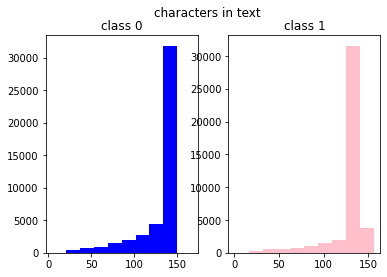

In [ ]:
import matplotlib.pyplot as plt
fig,(axis1,axis2)=plt.subplots(1,2)
char_len=df[df['Class']=='0']['Text'].str.len()
axis1.hist(char_len,color='blue')
axis1.set_title('class 0')
char_len=df[df['Class']=='1']['Text'].str.len()
axis2.hist(char_len,color='pink')
axis2.set_title('class 1')
fig.suptitle('characters in text')
plt.show()


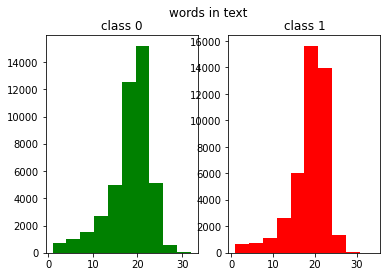

In [ ]:
fig,(axis1,axis2)=plt.subplots(1,2)
char_len=df[df['Class']=='0']['Text'].str.split().map(lambda x:len(x))
axis1.hist(char_len,color='green')
axis1.set_title('class 0')
char_len=df[df['Class']=='1']['Text'].str.split().map(lambda x:len(x))
axis2.hist(char_len,color='red')
axis2.set_title('class 1')
fig.suptitle('words in text')
plt.show()

In [ ]:
df['Class']=df['Class'].astype(int)

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in df[df['Class']==target]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


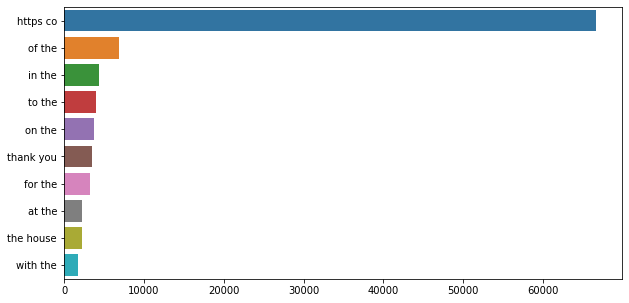

In [ ]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
plt.figure(figsize=(10,5))
top_bigrams=get_top_bigrams(df['Text'])[:10]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['Text']=df['Text'].apply(lambda x : remove_URL(x))

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Text']=df['Text'].apply(lambda x: remove_emoji(x))    

In [ ]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
df['Text']=df['Text'].apply(lambda x : remove_punct(x))

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
corpus=create_corpus(df)


100%|██████████| 86460/86460 [00:11<00:00, 7497.81it/s]


In [ ]:
print(corpus[:10])

[['today', 'senate', 'dems', 'vote', 'savetheinternet', 'proud', 'support', 'similar', 'netneutrality', 'legislation'], ['rt', 'winterhavensun', 'winter', 'haven', 'resident', 'alta', 'vista', 'teacher', 'one', 'several', 'recognized', 'repdarrensoto', 'national', 'teacher'], ['rt', 'nbclatino', 'repdarrensoto', 'noted', 'hurricane', 'maria', 'left', 'approximately', 'billion', 'damages', 'congress', 'allocated'], ['rt', 'nalcabpolicy', 'meeting', 'repdarrensoto', 'thanks', 'taking', 'time', 'meet', 'latinoleader', 'ed', 'marucci', 'guzman'], ['rt', 'vegalteno', 'hurricane', 'season', 'starts', 'june', 'puerto', 'rico', 'readinesswell', 'repdarrensoto', 'espaillatny'], ['rt', 'emgageactionfl', 'thank', 'came', 'orlando', 'gala', 'it', 'successful', 'night', 'would', 'possible'], ['hurricane', 'maria', 'left', 'approx', 'billion', 'damages', 'yet', 'billion', 'allocated', 'rebuilding', 'grid', 'no'], ['rt', 'tharryry', 'i', 'delighted', 'repdarrensoto', 'voting', 'cra', 'overrule', 'fcc

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-01-07 08:16:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-01-07 08:16:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-07 08:16:17--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!ls

 CVAssignmentDataset.csv   glove.6B.300d.txt   LICENSE
 glove.6B.100d.txt	   glove.6B.50d.txt   'Model Architecture.png'
 glove.6B.200d.txt	   glove.6B.zip        README.md


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Text'],df['Class'],test_size=0.2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
token = Tokenizer()
token.fit_on_texts(x_train)
seq = token.texts_to_sequences(x_train)
pad_seq = pad_sequences(seq,maxlen=50)
vocab_size = len(token.word_index)+1
embedding_vector = {}
f = open('glove.6B.50d.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef
embedding_matrix = np.zeros((vocab_size,50))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value


400000it [00:05, 78659.71it/s]
100%|██████████| 67619/67619 [00:00<00:00, 842736.80it/s]


In [ ]:
x_test = token.texts_to_sequences(x_test)
testing_seq = pad_sequences(x_test,maxlen=50)


AttributeError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Conv1D,MaxPool1D,Bidirectional,Dropout,Reshape,SpatialDropout1D
from keras.initializers import Constant

In [105]:
model = Sequential()
model.add(Embedding(vocab_size,50,weights = [embedding_matrix],input_length=50,trainable = False))
model.add(Conv1D(filters=32, kernel_size=5,padding='same'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.3))
model.add((LSTM(512)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])


In [106]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 50)            3381000   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 50, 32)            8032      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 25, 32)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 512)               1116160   
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)             

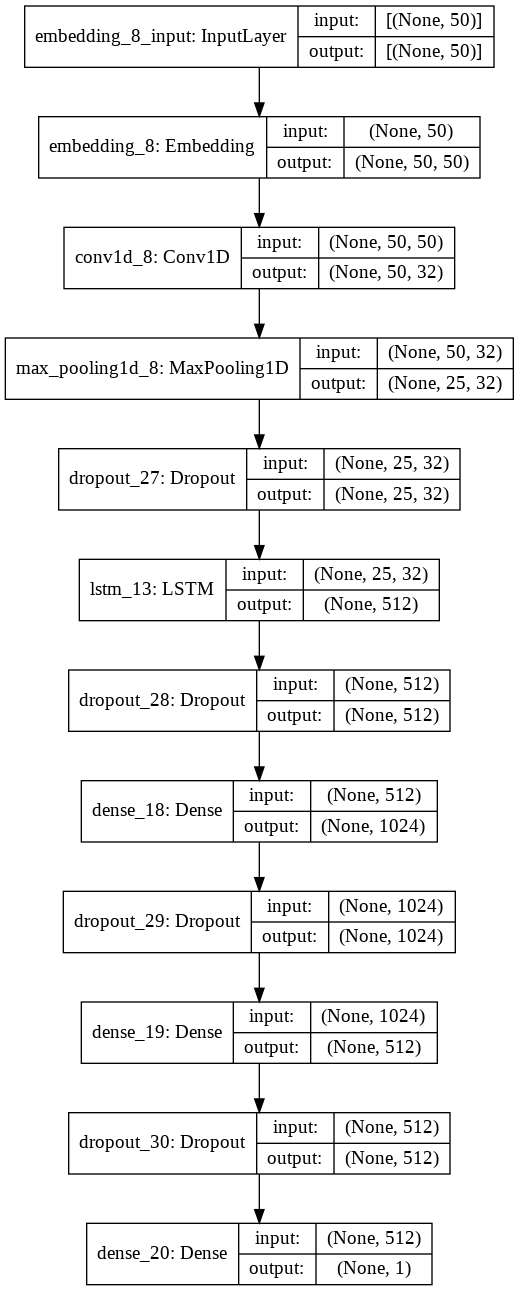

In [107]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [108]:
history = model.fit(pad_seq,y_train,batch_size=64,epochs=50,validation_split=0.2,verbose=2)

Epoch 1/50
865/865 - 8s - loss: 0.6703 - accuracy: 0.5899 - val_loss: 0.6582 - val_accuracy: 0.6023
Epoch 2/50
865/865 - 6s - loss: 0.6484 - accuracy: 0.6224 - val_loss: 0.6571 - val_accuracy: 0.5975
Epoch 3/50
865/865 - 7s - loss: 0.6367 - accuracy: 0.6346 - val_loss: 0.6347 - val_accuracy: 0.6319
Epoch 4/50
865/865 - 7s - loss: 0.6240 - accuracy: 0.6477 - val_loss: 0.6214 - val_accuracy: 0.6517
Epoch 5/50
865/865 - 6s - loss: 0.6123 - accuracy: 0.6573 - val_loss: 0.6165 - val_accuracy: 0.6553
Epoch 6/50
865/865 - 6s - loss: 0.6047 - accuracy: 0.6621 - val_loss: 0.6114 - val_accuracy: 0.6638
Epoch 7/50
865/865 - 6s - loss: 0.5958 - accuracy: 0.6719 - val_loss: 0.6139 - val_accuracy: 0.6626
Epoch 8/50
865/865 - 6s - loss: 0.5877 - accuracy: 0.6785 - val_loss: 0.6054 - val_accuracy: 0.6673
Epoch 9/50
865/865 - 6s - loss: 0.5781 - accuracy: 0.6854 - val_loss: 0.6057 - val_accuracy: 0.6690
Epoch 10/50
865/865 - 6s - loss: 0.5696 - accuracy: 0.6915 - val_loss: 0.6183 - val_accuracy: 0.6590

In [109]:
y_pred=model.predict(testing_seq)
model_loss = pd.DataFrame(history.history)

In [110]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.670256,0.589909,0.658245,0.602284
1,0.648403,0.622438,0.657124,0.597513
2,0.636690,0.634619,0.634725,0.631921
3,0.624021,0.647739,0.621432,0.651728
4,0.612273,0.657335,0.616486,0.655270


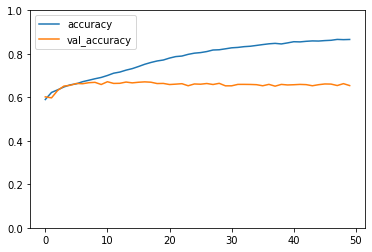

In [111]:
model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1]);

In [112]:
print((y_pred>0.5).astype(int))

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [113]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,matthews_corrcoef
print(classification_report(y_test,(y_pred>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      8945
           1       0.66      0.62      0.64      8347

    accuracy                           0.66     17292
   macro avg       0.66      0.66      0.66     17292
weighted avg       0.66      0.66      0.66     17292



In [114]:
print(confusion_matrix(y_test,(y_pred>0.5).astype(int)))

[[6252 2693]
 [3148 5199]]


In [115]:
print(accuracy_score(y_test,(y_pred>0.5).astype(int)))

0.6622137404580153


In [116]:
print(matthews_corrcoef(y_test,(y_pred>0.5).astype(int)))

0.3228339387028689


In [117]:
model.save('model.h5')

In [118]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>